---

# **Part I: Research Question**

## Research Question

My dataset for this data mining exercise includes data on a telco company’s current and former subscribers, with an emphasis on customer churn (whether customers are maintaining or discontinuing their subscription to service).  Data analysis performed on the dataset will be aimed with this research question in mind: can customers be reliably categorized into "clusters" based on the continuous numerical data included in the dataset, and if so, which characteristics?  Continuous numerical data will include numerical data which includes a measurable variable, rather than numerical data used as a label.

---

## Objectives and Goals

Conclusions gleaned from the analysis of this data can benefit stakeholders by revealing information on how customers can be grouped based on their characteristics.  Such information may be used to categorize customers based on another variable the telco company may be interested in predicting, such as customer churn.

---

# **Part II: Technique Justification**

## K-means Clustering



One assumption of k-means clustering is

---

## Tool Selection

All code execution was carried out via Jupyter Lab, using Python 3.  I used Python as my selected programming language due to prior familiarity and broader applications when considering programming in general.  R is a very strong and robust language tool for data analysis and statistics but finds itself somewhat limited to that niche role (Insights for Professionals, 2019).  I utilized the NumPy, Pandas, and Matplotlib libraries to perform many of my data analysis tasks, as they are among the most popular Python libraries employed for this purpose and see widespread use.  Seaborn is included primarily for its versatility and pleasing aesthetics when created visulizations.  

Beyond these libraries, I relied upon the scikit-learn library.  Scikit-learn supports k-means clustering, variable scaling and principal component analysis (KMeans, StandardScaler and PCA functions, respectively), and the course material relied upon its use.  I also used the parallel_coordinates function from pandas' plotting module for use in creating visualizations for the purpose of analyzing k-means clustering results.

In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

---

# **Part III: Data Preparation**

## Data Preparation Goals and Data Manipulations

I would like my data to include only variables relevant to my research question, and to be clean and free of missing values and duplicate rows.  My first steps will be to import the complete data set and execute functions that will give me information on its size and the data types of its variables.  I will then narrow the data set to a new dataframe containing only the variables I am concerned with, and then utilize functions to determine if any null values or duplicate rows exist.

By using the index_col parameter in my import I utilize CaseOrder, the data set's natural index column, as the index column in my pandas dataframe.

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv', dtype={'locationid':np.int64}, index_col=[0])

In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
# Display dataset top 5 rows
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Trim data set to variables relevant to research question
columns = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
           'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
df_data = pd.DataFrame(df[columns])
# Store the data set in variable 'X'
X = df_data

In [6]:
# Check data for null or missing values
df_data.isna().any()

Population              False
Children                False
Age                     False
Income                  False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Item1                   False
Item2                   False
Item3                   False
Item4                   False
Item5                   False
Item6                   False
Item7                   False
Item8                   False
dtype: bool

In [7]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

In [8]:
df_data.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,
1,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


---

## Summary Statistics

I can use the describe() function to display the summary statistics for the entire dataframe, as well as each variable I'll be evaluating for inclusion in the k-means clustering exercise.

In [9]:
# Display summary statistics for entire dataset - continuous variables
df_data.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


---

## Further Preparation Steps

I will use the StandardScaler function to scale my variables for more accurate attribute weighting.  StandardScaler transforms each variable value to have a mean of 0 and a variance of 1.  Once done, every variable value will fall between -1 and 1, and the data set values can be considered "standardized".  The standardized data set is then assigned to variable "X_scaled".

In [10]:
# Scaling continuous variables with StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.transform(X)

---

## Copy of Prepared Data Set

Below is the code used to export the prepared data set to CSV format.

In [11]:
df_prepared = pd.DataFrame(X_scaled, columns=df_data.columns)
# Export prepared dataframe to csv
df_prepared.to_csv(r'C:\Users\wstul\d212\churn_clean_perpared.csv')

---

# **Part IV: Analysis**

## Determining the Optimal Value for "k"

Using the best "k" value, or number of clusters, is critical in order to receive good results from the clustering.  With 19 features, this data frame is more likely to benefit from a lower "k" value.  I will use an iterative loop to help ultimately determine which value is best, but before doing that I will need to initialize a couple of arrays.  The first array contains the numbers 1-10, and will represent the k values used in the iterative loop.  The second array will be empty, intended to store the results from each iteration.

In [12]:
# Initializing the kvalues and inertia arrays
kvalues = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
inertia = np.array([])

---

## Iterative Loop and Inertia Values

The iterative loop will run the k-means algorithm for "i" number of clusters, "i" being each number in the "kvalues" array.  It will then fit the model to X_scaled, our standardized data set, print the resulting inertia value, and then add that inertia value to the "inertia" array.

In [13]:
# Iterative loop to determine best k value
for i in kvalues:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    print(kmeans.inertia_)
    # At the end of each loop the inertia observed during clustering is added to the inertia array
    inertia = np.append(inertia, kmeans.inertia_)

189999.99999999942
170985.87837308462
159747.51652791374
152673.11122733398
148826.07392708608
145621.15356659034
142643.91189954933
140097.64865286305
137829.69659447673
135334.8275645687


---

Being able to see the inertia values is good, but generating a visualization based on the inertia values and their related "k" values will be more helpful in spotting the optimal value for "k".  The below code will generate that visualization.

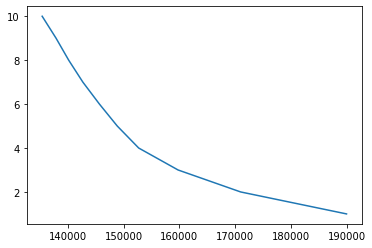

In [14]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()
# Plot the kvalue and inertia data on the axes.
ax.plot(inertia, kvalues);

---

I can see that the "elbow" in the visualization falls at the "k" value 4, indicating 4 is the optimal value of "k" for this data set.  I can then run the k-means algorithm specifying a "k" value of 4, and use the results to create clusters using KMeans.predict().

In [15]:
# k-means for 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
print(kmeans.inertia_)
clusters = kmeans.predict(X_scaled)

152673.0691274208


---

## Data Analysis Process

I will use the series of functions documented below to create visualizations based on the k-means clusters, which will allow me to better analyze the results.

* display_factorial_planes - utilizes matplotlib to generate a scatter plot on a factorial plane, one for each factorial plane, and highlight cluster centroids
* display_parallel_coordinates - utilizes matplotlib to display a parallel coordinates plot for the clusters
* display_parallel_coordinates_centroids - utilizes matplotlib to display a parallel coordinates plot for the centroids
* addAlpha - used to manipulate color and opacity

In [16]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    # Display a scatter plot on a factorial plane, one for each factorial plane

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [17]:
def display_parallel_coordinates(df, num_clusters):
    # Display a parallel coordinates plot for the clusters 

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(16, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)

In [18]:
def display_parallel_coordinates_centroids(df, num_clusters):
    # Display a parallel coordinates plot for the centroids

    # Create the plot
    fig = plt.figure(figsize=(16, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

In [19]:
def addAlpha(colour, alpha):
    # Add an alpha to the RGB colour
    
    return (colour[0],colour[1],colour[2],alpha)

---

My feature set currently has 19 dimensions, too many to visualize.  Using principal component analysis I can narrow this down to 2 and create a new data frame with the PCA results, adding my cluster labels as an additional column.

In [20]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters

X_reduceddf.head()

,PC1,PC2,cluster
CaseOrder,,,
1,1.941289,-1.340946,0
2,-0.211778,-1.639756,1
3,-0.671599,-0.903389,1
4,0.025187,-0.739404,0
5,1.350071,-1.852383,0


I will use PCA again on my cluster centers so I can have them appear as part of the visualized clusters as well.

In [21]:
centers_reduced = pca.transform(kmeans.cluster_centers_)

Using the display_factorial_planes function I can view the clusters and their centroids in a scatter plot and observe if any significant overlap has occurred.

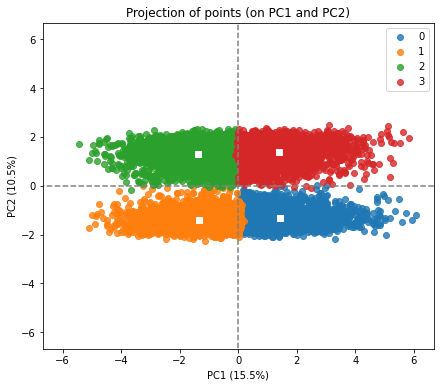

In [22]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1],
            marker='s', color='w', zorder=10)

I'll add the cluster labels, the numbers 0-3, to my standardized data set in a new data frame, "X_clustered".  I can then see the distribution of variables in each cluster by using parallel coordinates plots.

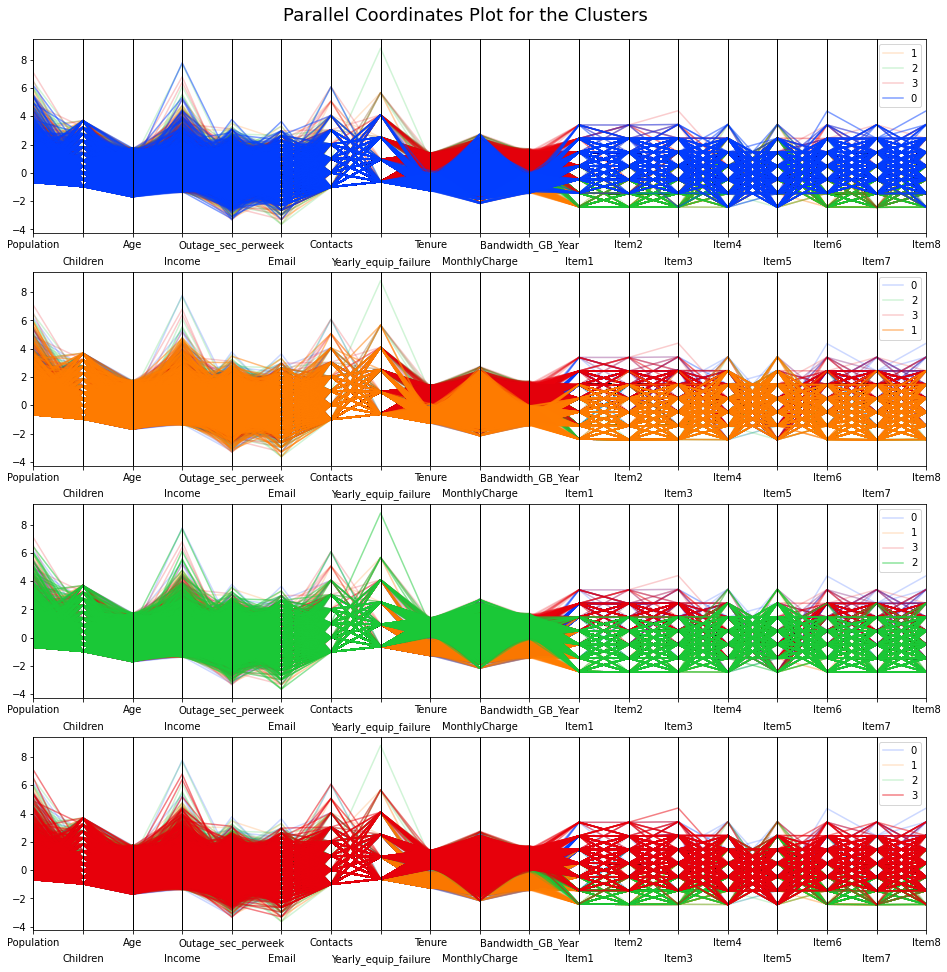

In [23]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
palette = sns.color_palette("bright", 10)
display_parallel_coordinates(X_clustered, 4)

The parallel coordinates plots reveal a great deal about which features are represented in each cluster, and to what degree.  Drilling down further, I can use the same type of plot to view the centroids for each cluster.

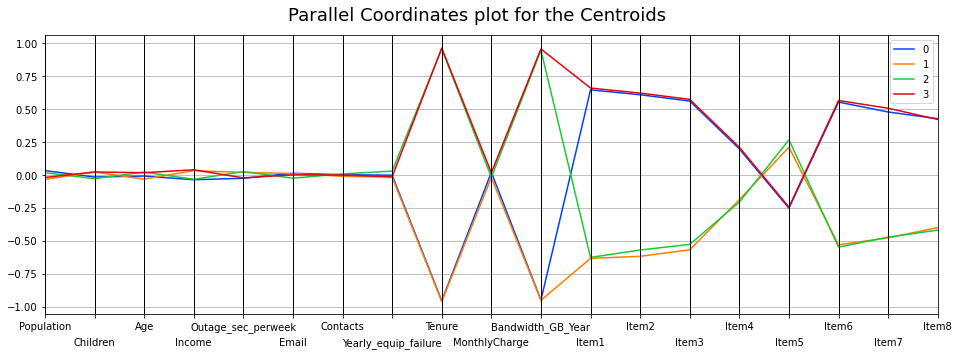

In [24]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

---

# **Part V: Data Summary and Implications**

## Summary of Findings



---

## Recommended Course of Action



---

# **Part VI: Demonstration**

**Panopto Video Recording**

A link for the Panopto video has been provided separately.  The demonstration includes the following:

•  Demonstration of the functionality of the code used for the analysis

•  Identification of the version of the programming environment

•  Comparison of the two multiple regression models you used in your analysis

•  Interpretation of the coefficients


---

# **Web Sources**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

https://pbpython.com/categorical-encoding.html

https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290



---

# **References**


Insights for Professionals. (2019, February 26). *5 Niche Programming Languages (And Why They're Underrated).* https://www.insightsforprofessionals.com/it/software/niche-programming-languages


Parra, H.  (2021, April 20).  *The Data Science Trilogy.*  Towards Data Science.  https://towardsdatascience.com/the-data-science-trilogy-numpy-pandas-and-matplotlib-basics-42192b89e26


Zach.  (2021, November 16).  *The 6 Assumptions of Logistic Regression (With Examples).*  Statology.  https://www.statology.org/assumptions-of-logistic-regression/


Robinson, N.  (2018, June 28).  *The Disadvantages of Logistic Regression.*  The Classroom.  https://www.theclassroom.com/multivariate-statistical-analysis-2448.html
